# **1) - Library**

In [21]:
## 1) - Import Files from kaggle
import zipfile
from google.colab import files
# ==============================================
## 2) - Create Folder
import os
import glob as gb
# ==============================================
## 3) - Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
# ==============================================
## 4) - Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
# Data Augmentation
from keras.preprocessing.image import  ImageDataGenerator
# Read Image
import cv2 as cv
# ==============================================
## 5) - Deep Learning Model
from keras.models import Sequential
from keras.layers import Dense , Conv2D , MaxPool2D , BatchNormalization , Flatten , Dropout
from keras.callbacks import EarlyStopping
# Load and save Model
from keras.models import Model , load_model
from keras.utils import load_img , img_to_array

# **2) - Data Preprocessing**

## **2.1) - Load Data**

In [22]:
# Install Kaggle
! pip install Kaggle

In [23]:
# Upload Kaggle Json File
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"mohamedhamdan662001","key":"ea6308b00469e9d837934283e802c95c"}'}

In [24]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# API Data From Kaggle
! kaggle datasets download -d miracle9to9/files1
print('\n\n')
# Zip File Data
!ls

files1.zip: Skipping, found more recently modified local copy (use --force to force download)



 files		   'kaggle (2).json'			    sample_data
 files1.zip	    kaggle.json
'kaggle (1).json'  'Malaria Image Classification(CNN).h5'


In [25]:
# Extract Files
zip_ref = zipfile.ZipFile('/content/files1.zip')
zip_ref.extractall('files')
zip_ref.close()

## **2.2) - Read Data**

In [26]:
# Path Of Data
train_path = '/content/files/Malaria Cells/training_set'
test_path = '/content/files/Malaria Cells/testing_set'

In [27]:
# Number Of Image Training Data
sum_train = 0
for folder in os.listdir(train_path):
  files_img_train = gb.glob(pathname = (str(train_path +'/' + folder + '/*.png')))
  print(f'For Training Data , Found {len(files_img_train)} in folder {folder}')
  sum_train = sum_train + len(files_img_train)
print('Number Of Training Data = ',sum_train)
print('\n=====================================\n')
print('\n=====================================\n')
# =============================================================
# =============================================================
# Number Of Image Test Data
sum_test = 0
for folder in os.listdir(test_path):
  files_img_train = gb.glob(pathname = (str(test_path +'/' + folder + '/*.png')))
  print(f'For Testing Data , Found {len(files_img_train)} in folder {folder}')
  sum_test = sum_test + len(files_img_train)
print('Number Of Test Data = ',sum_test)

For Training Data , Found 13779 in folder Uninfected
For Training Data , Found 13779 in folder Parasitized
Number Of Training Data =  27558




For Testing Data , Found 7880 in folder Uninfected
For Testing Data , Found 7952 in folder Parasitized
Number Of Test Data =  15832


In [28]:
# Size Image For Train Data
size_train = []
dim_train_width = []
dim_train_height = []
for folder in os.listdir(train_path):
  files_img = gb.glob(pathname= str(train_path + '/' + folder + '/*.png'))
  for file in files_img:
    img = plt.imread(file)
    size_train.append(img.shape)
    # ========================
    d1,d2,colors = img.shape
    dim_train_width.append(d1)
    dim_train_height.append(d2)
# =============================================================
# To show shape Image for train Data
print(pd.Series(size_train).value_counts())
print('========================================')
print('Number Of Diffrent Shape Image : ',len(pd.Series(size_train).value_counts()))
print('========================================')
print('Mini Image Shape = ',min(size_train))
print('Max Image Shape = ',max(size_train))
print('========================================')
print('Number of Width Train Data = ',len(dim_train_width))
print('Number of Height Train Data = ',len(dim_train_height))

(130, 130, 3)    224
(124, 127, 3)    200
(130, 127, 3)    199
(124, 124, 3)    191
(127, 124, 3)    187
                ... 
(85, 130, 3)       1
(100, 73, 3)       1
(235, 232, 3)      1
(190, 199, 3)      1
(199, 130, 3)      1
Length: 1627, dtype: int64
Number Of Diffrent Shape Image :  1627
Mini Image Shape =  (40, 55, 3)
Max Image Shape =  (385, 247, 3)
Number of Width Train Data =  27558
Number of Height Train Data =  27558


132.9834530807751
132.48715436533857


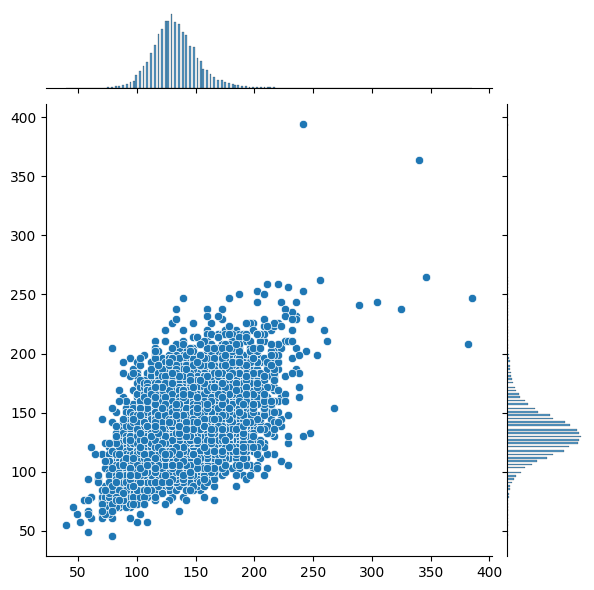

In [29]:
sns.jointplot(x = dim_train_width , y = dim_train_height);
print(np.mean(dim_train_width))
print(np.mean(dim_train_height))

In [30]:
# Size Image For Test Data
size_test = []
dim_test_width = []
dim_test_height = []

for folder in os.listdir(test_path):
  files_img = gb.glob(pathname= str(test_path + '/' + folder + '/*.png'))
  for file in files_img:
    img = plt.imread(file)
    size_test.append(img.shape)
    # ========================
    d1,d2,colors = img.shape
    dim_test_width.append(d1)
    dim_test_height.append(d2)

# To show shape Image for test Data
print(pd.Series(size_test).value_counts())
print('========================================')
print('Number Of Diffrent Shape Image : ',len(pd.Series(size_test).value_counts()))
print('========================================')
print('Mini Image Shape = ',min(size_test))
print('Max Image Shape = ',max(size_test))
print('========================================')
print('Number of Width Test Data = ',len(dim_test_width))
print('Number of Height Test Data = ',len(dim_test_height))

(130, 130, 3)    117
(124, 127, 3)    111
(130, 136, 3)    105
(130, 127, 3)    104
(130, 133, 3)    101
                ... 
(73, 124, 3)       1
(223, 145, 3)      1
(184, 112, 3)      1
(160, 97, 3)       1
(199, 130, 3)      1
Length: 1457, dtype: int64
Number Of Diffrent Shape Image :  1457
Mini Image Shape =  (40, 55, 3)
Max Image Shape =  (385, 247, 3)
Number of Width Test Data =  15832
Number of Height Test Data =  15832


134.769264780192
134.09733451238


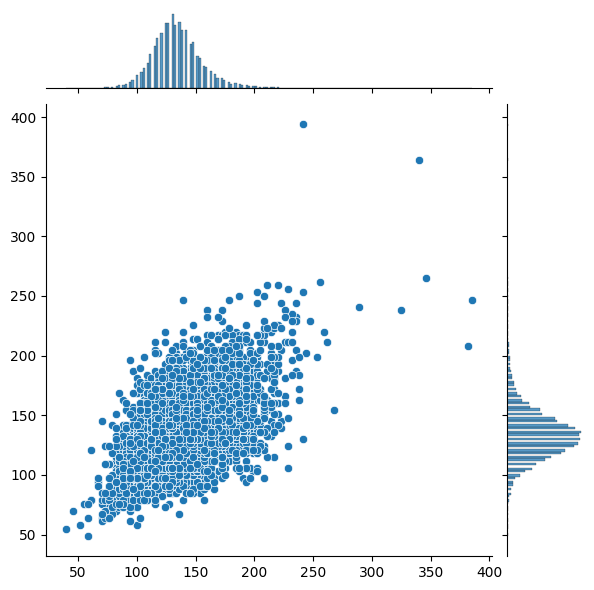

In [31]:
sns.jointplot(x = dim_test_width , y = dim_test_height);
print(np.mean(dim_test_width))
print(np.mean(dim_test_height))

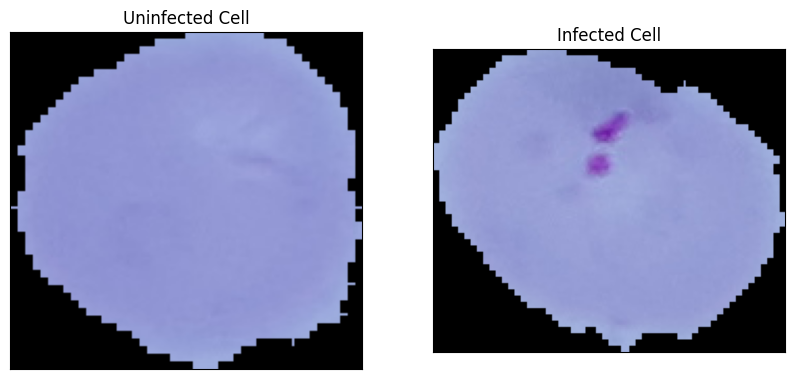

In [32]:
# label Data
class_image = {'Parasitized':0,'Uninfected':1 }
# ===============================================
# ===============================================
# To show Name Of class After Predicting
def getClass(n):
  for x , y  in class_image.items():
    if n == y:
      return x
# ===============================================
# ===============================================
Uninfected='/content/files/Malaria Cells/testing_set/Uninfected/C100P61ThinF_IMG_20150918_144348_cell_131.png'
Infected='/content/files/Malaria Cells/testing_set/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_167.png'
# ===> Show Img 1
plt.figure(1, figsize = (10 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cv.imread(Uninfected))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])
# ===> Show Img 2
plt.subplot(1 , 2 , 2)
plt.imshow(cv.imread(Infected))
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

#**Malaria detection in blood smear images and Detect parasites in blood samples.**

## **2.3) - Data Augmentation**

In [33]:
datagen = ImageDataGenerator( rescale=1./255 ,rotation_range = 20,height_shift_range=0.10 , horizontal_flip=True,
                             zoom_range=0.1 , shear_range=0.1 , width_shift_range=0.10 ,  fill_mode='nearest')

## ====================================
# Train Data
train_generator = datagen.flow_from_directory(
    directory= train_path,
    target_size=(130, 130),
    color_mode="rgb",
    batch_size=16,
    class_mode="binary",
)
print(train_generator)
# =================================
# Testing Data
test_generator = datagen.flow_from_directory(
    directory= test_path,
    target_size=(130, 130),
    color_mode="rgb",
    batch_size=16,
    class_mode="binary",
    shuffle=False
)
# ========================================
x_train, y_train = train_generator.next()
x_test, y_test = test_generator.next()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(train_generator.class_indices)
print(test_generator.class_indices)

Found 27558 images belonging to 2 classes.
Found 15832 images belonging to 2 classes.
(16, 130, 130, 3) (16,)
(16, 130, 130, 3) (16,)
{'Parasitized': 0, 'Uninfected': 1}
{'Parasitized': 0, 'Uninfected': 1}


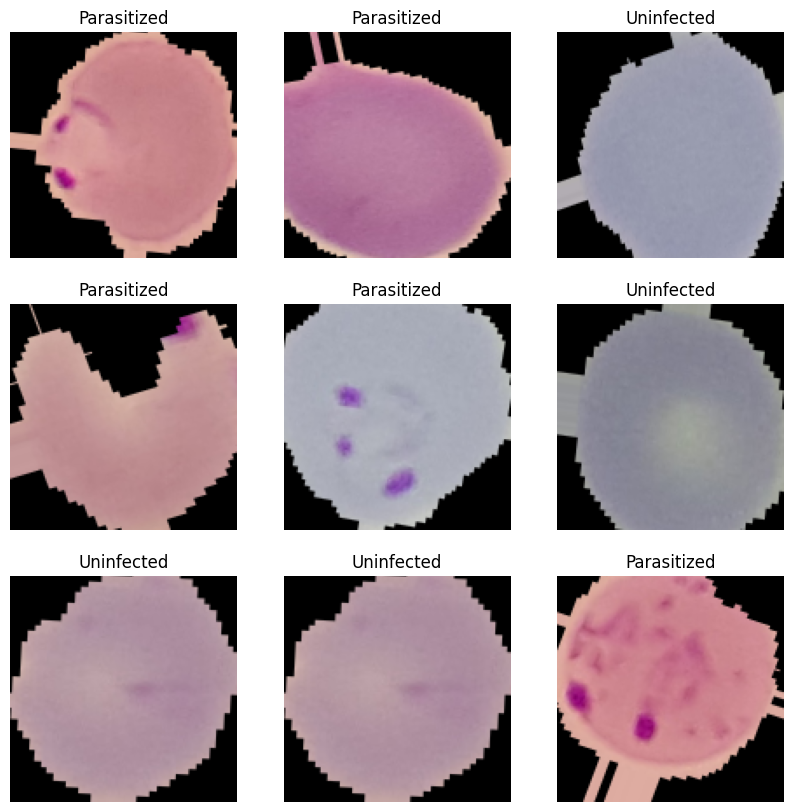

In [34]:
# Visualization Image
# Show Random Labled Image From Train
plt.figure(figsize=(10,10))
for n , i in enumerate(list(np.random.randint(0,len(x_train),9))):
  plt.subplot(3,3,n+1)
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.title(getClass(y_train[i]))

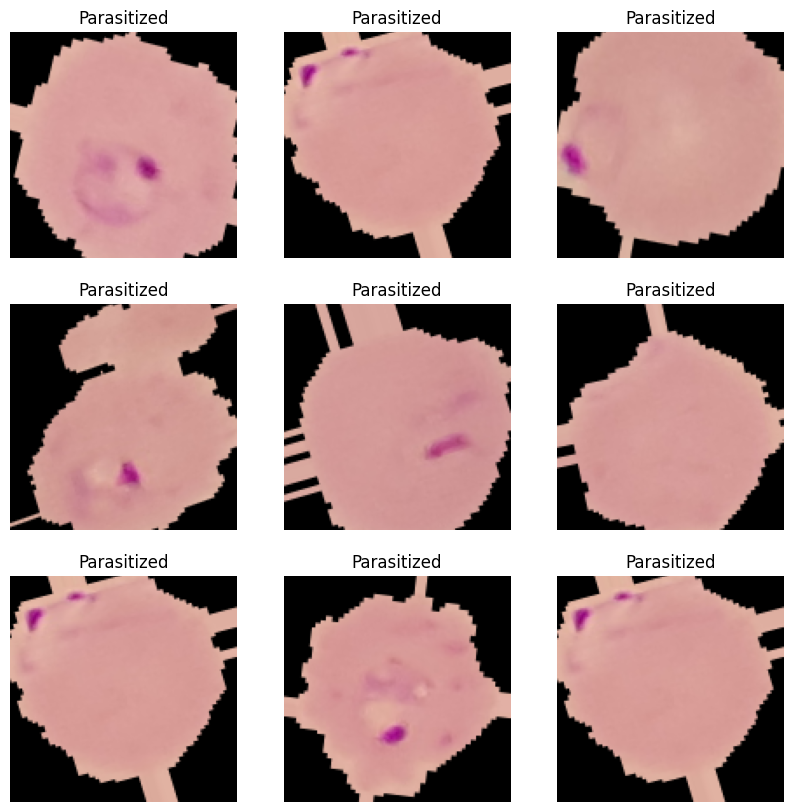

In [35]:
# Show Random Labled Image From test
plt.figure(figsize=(10,10))
for n,i in enumerate(list(np.random.randint(0,len(x_test),9))):
  plt.subplot(3,3,n+1)
  plt.imshow(x_test[i])
  plt.axis('off')
  plt.title(getClass(y_test[i]))

# **3) - Build Model   [ CNN ]**

##**3.1) - Define the model**

In [36]:
# # Model Sequential
model = Sequential()
# Layer 1 =====> Input Layer
model.add(Conv2D(32,kernel_size=(3,3), activation='relu',input_shape = (130,130,3)))
model.add(MaxPool2D(2,2))
# layer 2
model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
# layer 4
model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
# layer 5
model.add(Flatten())
# Layer 6
model.add(Dense(128,activation= 'relu'))
model.add(Dropout(0.5))
# Layer 7 =====> Output Layer
model.add(Dense(2,activation='softmax'))

In [37]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [38]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 64)       

In [39]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [40]:
Main_model = model.fit_generator(train_generator,validation_data = test_generator ,epochs = 10 , callbacks=[early_stop])

Epoch 1/10


<ipython-input-40-617d3fb4ac4f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  Main_model = model.fit_generator(train_generator,validation_data = test_generator ,epochs = 10 , callbacks=[early_stop])


1723/1723 [==============================] - 637s 369ms/step - loss: 0.6275 - accuracy: 0.6287 - val_loss: 0.3273 - val_accuracy: 0.9125
Epoch 2/10
1723/1723 [==============================] - 648s 376ms/step - loss: 0.2378 - accuracy: 0.9234 - val_loss: 0.1851 - val_accuracy: 0.9403
Epoch 3/10
1723/1723 [==============================] - 607s 352ms/step - loss: 0.1859 - accuracy: 0.9425 - val_loss: 0.1901 - val_accuracy: 0.9377
Epoch 4/10
1723/1723 [==============================] - 630s 366ms/step - loss: 0.1775 - accuracy: 0.9449 - val_loss: 0.1658 - val_accuracy: 0.9462
Epoch 5/10
1723/1723 [==============================] - 597s 347ms/step - loss: 0.1718 - accuracy: 0.9475 - val_loss: 0.1632 - val_accuracy: 0.9466
Epoch 6/10
1723/1723 [==============================] - 629s 365ms/step - loss: 0.1651 - accuracy: 0.9482 - val_loss: 0.1528 - val_accuracy: 0.9457
Epoch 7/10
1723/1723 [==============================] - 630s 366ms/step - loss: 0.1640 - accuracy: 0.9499 - val_loss: 0.162

# **4) - Evaluate Model**

## **4.1) - Training and validation curves**

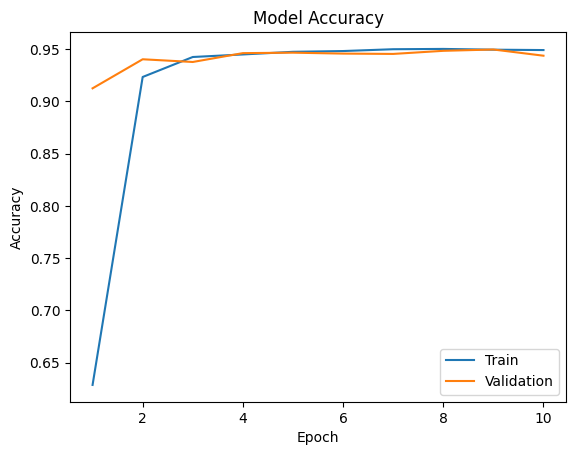

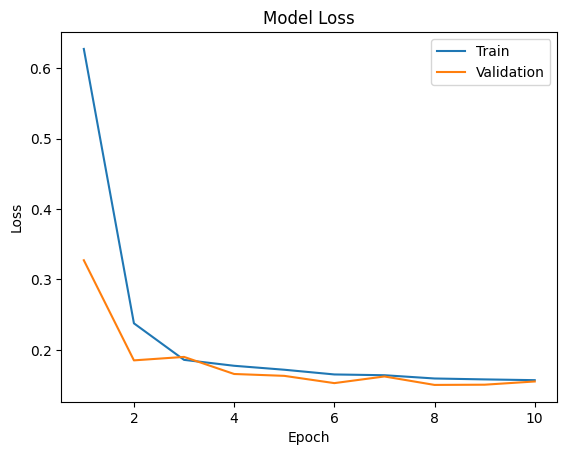

In [42]:
def plot_Learning_curve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='lower right')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper right')
  plt.show()

# ======= Show Curve ===============
plot_Learning_curve(Main_model , 10)

## **4.2) - Confusion Matrix**

In [43]:
def plot_confusion_matrix(cm,classes,normalize = False , title = 'Confusion Matrix',cmap = plt.cm.Blues):
  # Design Confusion matrix
  plt.imshow(cm,cmap = cmap)
  plt.title(title)
  plt.colorbar()

  # x & y axis for confusion matrix
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, labels=["Parasitized", "Uninfected"])
  plt.yticks(tick_marks, labels=["Parasitized", "Uninfected"])
  '''
  it converts the confusion matrix to row-wise normalized probabilities,
  which is useful for interpretation as it shows the prediction accuracy
  per class independent of class populations in the data.
  '''
  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1) [: , np.newaxis] # total predictions made for each actual class.

  # <===================================================================>
  # To distribute values in confusion matrix

  thresh = cm.max()/2
  for i ,j in itertools.product(range(cm.shape[0]) , range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment = 'center' ,color='white' if cm[i,j] > thresh else 'black' )

  # <===================================================================>
  plt.tight_layout() # To adjust subplot parameters to give specified padding
  plt.ylabel('True label\n')
  plt.xlabel('\nPredicted label')

In [44]:
# Predict the values from the validation dataset
y_pred = model.predict(test_generator)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(test_generator.classes, y_pred_classes)

990/990 [==============================] - 119s 120ms/step


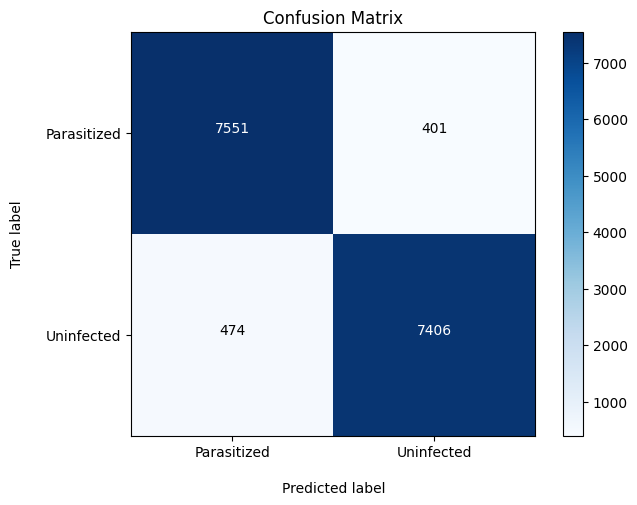

In [45]:
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

In [46]:
errors = (y_pred_classes - test_generator.classes != 0 ) # False Predict Value
# =======
y_pred_classes_errors = y_pred_classes[errors]
# =======
y_pred_errors = y_pred[errors]
# =======
y_true_errors = test_generator.classes[errors]


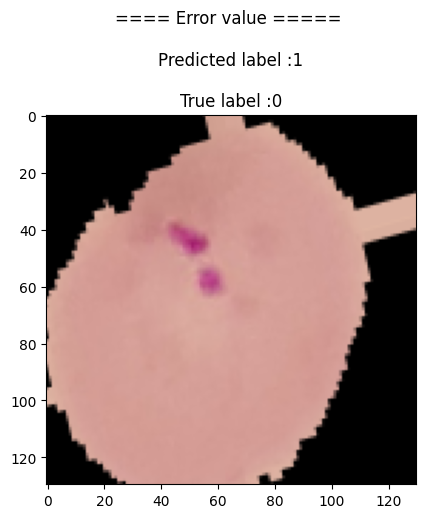

In [47]:
err = 5
plt.imshow(x_test[err])
plt.title(f"==== Error value ===== \n\nPredicted label :{y_pred_classes_errors[err]}\n\nTrue label :{y_true_errors[err]}");

# **5) - Save Model**

In [48]:
Model_Save=model.save('Malaria Image Classification(CNN).h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [49]:
# load Model
Model_Load=load_model('/content/Malaria Image Classification(CNN).h5')

1/1 [==============================] - 0s 25ms/step


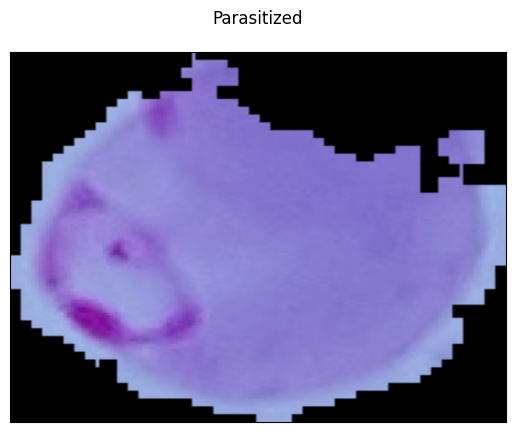

In [60]:
## Model Predticting
path = '/content/files/Malaria Cells/single_prediction/Parasitised.png'
img_2 = cv.imread(path)

img = load_img(path,target_size=(130,130))

x= img_to_array(img)
x=np.expand_dims(x, axis=0)


classes = Model_Load.predict(x)
result = int(np.argmax(classes))
if result == 0:
    plt.imshow(img_2, aspect='auto')
    plt.xticks([]), plt.yticks([]);
    plt.title('Parasitized\n')
else:
    plt.imshow(img_2, aspect='auto')
    plt.xticks([]), plt.yticks([]);
    plt.title('Uninfected\n')